In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding, Dropout
from tensorflow.keras.preprocessing import text, sequence 
from tensorflow.keras.models import Sequential

In [2]:
df = pd.read_csv("../csv_data/user_1_timewindow1.csv")
df = df.fillna(-10000)
# df = df.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
df = df.replace((np.inf, -np.inf), 0).reset_index(drop=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17298 entries, 0 to 17297
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            17298 non-null  object 
 1   dist_s               17298 non-null  float64
 2   angle_s              17298 non-null  float64
 3   mean_dist            17298 non-null  float64
 4   min_dist             17298 non-null  float64
 5   view_dist            17298 non-null  float64
 6   average_mouse_speed  17298 non-null  float64
 7   useful               17298 non-null  int64  
 8   useless              17298 non-null  int64  
 9   aiming               17298 non-null  int64  
 10  shooting             17298 non-null  int64  
 11  moving               17298 non-null  int64  
 12  class                17298 non-null  int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 1.7+ MB


In [4]:
from datetime import datetime
def createDfTimeSequence(df, timewindow):
    arrWithTimeWindow = []
    y = []
    for i in range(0, len(df)-timewindow):
        slc = df[i:i+timewindow]
        arr = slc.to_numpy()
        t = datetime.fromisoformat(arr[-1][0])-datetime.fromisoformat(arr[0][0])
        arr = slc.to_numpy()
        if t.seconds!=timewindow-1:
            continue
        y.append(max(arr.T[12]))
        slc = slc.drop(['class', 'timestamp'], axis =1)
        arr = slc.to_numpy()
        arrWithTimeWindow.append(arr)
        

    newdf = arrWithTimeWindow 
    return newdf, y

In [34]:
DF , Y = createDfTimeSequence(df, 32)
inputs = np.asarray(DF)
targets = np.asarray(Y)


In [35]:
targets = np.where(targets == 2, 1, targets)

In [38]:
np.count_nonzero(targets == 2)


0

In [39]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True)

Epoch 1/50
238/238 [==============================] - 4s 9ms/step - loss: 0.5942 - accuracy: 0.7038 - val_loss: 0.5588 - val_accuracy: 0.7265
Epoch 2/50
238/238 [==============================] - 1s 6ms/step - loss: 0.5456 - accuracy: 0.7425 - val_loss: 0.5511 - val_accuracy: 0.7442
Epoch 3/50
238/238 [==============================] - 1s 6ms/step - loss: 0.5385 - accuracy: 0.7465 - val_loss: 0.5492 - val_accuracy: 0.7407
Epoch 4/50
238/238 [==============================] - 1s 6ms/step - loss: 0.5301 - accuracy: 0.7535 - val_loss: 0.5435 - val_accuracy: 0.7389
Epoch 5/50
238/238 [==============================] - 1s 6ms/step - loss: 0.5239 - accuracy: 0.7554 - val_loss: 0.5424 - val_accuracy: 0.7377
Epoch 6/50
238/238 [==============================] - 1s 6ms/step - loss: 0.5259 - accuracy: 0.7561 - val_loss: 0.5433 - val_accuracy: 0.7372
Epoch 7/50
238/238 [==============================] - 1s 6ms/step - loss: 0.5266 - accuracy: 0.7554 - val_loss: 0.5402 - val_accuracy: 0.7425
Epoch 

Train accuracy: 75.51
Test accuracy: 72.18
Epoch 1/50
238/238 [==============================] - 4s 9ms/step - loss: 0.5824 - accuracy: 0.7216 - val_loss: 0.5389 - val_accuracy: 0.7578
Epoch 2/50
238/238 [==============================] - 1s 6ms/step - loss: 0.5532 - accuracy: 0.7391 - val_loss: 0.5657 - val_accuracy: 0.7360
Epoch 3/50
238/238 [==============================] - 1s 6ms/step - loss: 0.5594 - accuracy: 0.7362 - val_loss: 0.5459 - val_accuracy: 0.7437
Epoch 4/50
238/238 [==============================] - 1s 6ms/step - loss: 0.5442 - accuracy: 0.7513 - val_loss: 0.5348 - val_accuracy: 0.7620
Epoch 5/50
238/238 [==============================] - 1s 6ms/step - loss: 0.5480 - accuracy: 0.7423 - val_loss: 0.5528 - val_accuracy: 0.7289
Epoch 6/50
238/238 [==============================] - 1s 6ms/step - loss: 0.5444 - accuracy: 0.7463 - val_loss: 0.5299 - val_accuracy: 0.7614
Epoch 7/50
238/238 [==============================] - 1s 6ms/step - loss: 0.5296 - accuracy: 0.7536 - val

Train accuracy: 75.12
Test accuracy: 75.13
Epoch 1/50
238/238 [==============================] - 4s 10ms/step - loss: 0.5750 - accuracy: 0.7156 - val_loss: 0.5196 - val_accuracy: 0.7767
Epoch 2/50
238/238 [==============================] - 1s 6ms/step - loss: 0.5391 - accuracy: 0.7533 - val_loss: 0.5126 - val_accuracy: 0.7655
Epoch 3/50
238/238 [==============================] - 1s 6ms/step - loss: 0.5346 - accuracy: 0.7482 - val_loss: 0.5138 - val_accuracy: 0.7649
Epoch 4/50
238/238 [==============================] - 1s 6ms/step - loss: 0.5303 - accuracy: 0.7522 - val_loss: 0.5073 - val_accuracy: 0.7744
Epoch 5/50
238/238 [==============================] - 1s 6ms/step - loss: 0.5236 - accuracy: 0.7556 - val_loss: 0.5072 - val_accuracy: 0.7720
Epoch 6/50
238/238 [==============================] - 1s 6ms/step - loss: 0.5236 - accuracy: 0.7553 - val_loss: 0.5053 - val_accuracy: 0.7738
Epoch 7/50
238/238 [==============================] - 1s 6ms/step - loss: 0.5235 - accuracy: 0.7523 - va

Train accuracy: 78.39
Test accuracy: 79.09
Epoch 1/50
238/238 [==============================] - 4s 9ms/step - loss: 0.6406 - accuracy: 0.6290 - val_loss: 0.5732 - val_accuracy: 0.7537
Epoch 2/50
238/238 [==============================] - 1s 6ms/step - loss: 0.5631 - accuracy: 0.7319 - val_loss: 0.5391 - val_accuracy: 0.7584
Epoch 3/50
238/238 [==============================] - 1s 6ms/step - loss: 0.5528 - accuracy: 0.7378 - val_loss: 0.5368 - val_accuracy: 0.7602
Epoch 4/50
238/238 [==============================] - 1s 6ms/step - loss: 0.5451 - accuracy: 0.7403 - val_loss: 0.5327 - val_accuracy: 0.7566
Epoch 5/50
238/238 [==============================] - 1s 6ms/step - loss: 0.5423 - accuracy: 0.7411 - val_loss: 0.5281 - val_accuracy: 0.7578
Epoch 6/50
238/238 [==============================] - 1s 6ms/step - loss: 0.5513 - accuracy: 0.7329 - val_loss: 0.5517 - val_accuracy: 0.7454
Epoch 7/50
238/238 [==============================] - 1s 6ms/step - loss: 0.5591 - accuracy: 0.7270 - val

Train accuracy: 77.65
Test accuracy: 77.73
Epoch 1/50
238/238 [==============================] - 4s 9ms/step - loss: 0.6073 - accuracy: 0.6990 - val_loss: 0.5774 - val_accuracy: 0.7307
Epoch 2/50
238/238 [==============================] - 1s 6ms/step - loss: 0.6143 - accuracy: 0.6570 - val_loss: 0.6121 - val_accuracy: 0.6462
Epoch 3/50
238/238 [==============================] - 1s 6ms/step - loss: 0.6093 - accuracy: 0.6578 - val_loss: 0.6041 - val_accuracy: 0.6740
Epoch 4/50
238/238 [==============================] - 1s 6ms/step - loss: 0.5983 - accuracy: 0.6681 - val_loss: 0.5723 - val_accuracy: 0.6745
Epoch 5/50
238/238 [==============================] - 1s 6ms/step - loss: 0.5697 - accuracy: 0.7246 - val_loss: 0.5489 - val_accuracy: 0.7626
Epoch 6/50
238/238 [==============================] - 1s 6ms/step - loss: 0.5530 - accuracy: 0.7365 - val_loss: 0.5211 - val_accuracy: 0.7685
Epoch 7/50
238/238 [==============================] - 1s 6ms/step - loss: 0.5323 - accuracy: 0.7502 - val

Train accuracy: 75.92
Test accuracy: 75.19
Epoch 1/50
239/239 [==============================] - 4s 9ms/step - loss: 0.6270 - accuracy: 0.6606 - val_loss: 0.5487 - val_accuracy: 0.7565
Epoch 2/50
239/239 [==============================] - 2s 7ms/step - loss: 0.5530 - accuracy: 0.7380 - val_loss: 0.5456 - val_accuracy: 0.7476
Epoch 3/50
239/239 [==============================] - 2s 7ms/step - loss: 0.5651 - accuracy: 0.7238 - val_loss: 0.5390 - val_accuracy: 0.7429
Epoch 4/50
239/239 [==============================] - 2s 7ms/step - loss: 0.5552 - accuracy: 0.7331 - val_loss: 0.5357 - val_accuracy: 0.7441
Epoch 5/50
239/239 [==============================] - 2s 7ms/step - loss: 0.5497 - accuracy: 0.7377 - val_loss: 0.5256 - val_accuracy: 0.7553
Epoch 6/50
239/239 [==============================] - 2s 7ms/step - loss: 0.5453 - accuracy: 0.7430 - val_loss: 0.5091 - val_accuracy: 0.7583
Epoch 7/50
239/239 [==============================] - 2s 7ms/step - loss: 0.5320 - accuracy: 0.7576 - val

Train accuracy: 77.51
Test accuracy: 76.48
Epoch 1/50
239/239 [==============================] - 5s 10ms/step - loss: 0.6101 - accuracy: 0.6849 - val_loss: 0.5615 - val_accuracy: 0.7311
Epoch 2/50
239/239 [==============================] - 2s 8ms/step - loss: 0.5555 - accuracy: 0.7399 - val_loss: 0.5424 - val_accuracy: 0.7553
Epoch 3/50
239/239 [==============================] - 2s 8ms/step - loss: 0.5462 - accuracy: 0.7406 - val_loss: 0.5404 - val_accuracy: 0.7512
Epoch 4/50
239/239 [==============================] - 2s 8ms/step - loss: 0.5399 - accuracy: 0.7481 - val_loss: 0.5184 - val_accuracy: 0.7524
Epoch 5/50
239/239 [==============================] - 2s 8ms/step - loss: 0.5334 - accuracy: 0.7513 - val_loss: 0.5215 - val_accuracy: 0.7695
Epoch 6/50
239/239 [==============================] - 2s 8ms/step - loss: 0.5324 - accuracy: 0.7543 - val_loss: 0.5127 - val_accuracy: 0.7713
Epoch 7/50
239/239 [==============================] - 2s 8ms/step - loss: 0.5209 - accuracy: 0.7616 - va

Train accuracy: 77.19
Test accuracy: 77.36
Epoch 1/50
239/239 [==============================] - 5s 10ms/step - loss: 0.6050 - accuracy: 0.6776 - val_loss: 0.5251 - val_accuracy: 0.7642
Epoch 2/50
239/239 [==============================] - 2s 9ms/step - loss: 0.5702 - accuracy: 0.7221 - val_loss: 0.5379 - val_accuracy: 0.7559
Epoch 3/50
239/239 [==============================] - 2s 8ms/step - loss: 0.5676 - accuracy: 0.7261 - val_loss: 0.5300 - val_accuracy: 0.7595
Epoch 4/50
239/239 [==============================] - 2s 8ms/step - loss: 0.5630 - accuracy: 0.7258 - val_loss: 0.5336 - val_accuracy: 0.7565
Epoch 5/50
239/239 [==============================] - 2s 8ms/step - loss: 0.5524 - accuracy: 0.7316 - val_loss: 0.5199 - val_accuracy: 0.7571
Epoch 6/50
239/239 [==============================] - 2s 8ms/step - loss: 0.5543 - accuracy: 0.7253 - val_loss: 0.5174 - val_accuracy: 0.7577
Epoch 7/50
239/239 [==============================] - 2s 8ms/step - loss: 0.5509 - accuracy: 0.7322 - va

Train accuracy: 73.83
Test accuracy: 74.65
Epoch 1/50
239/239 [==============================] - 4s 9ms/step - loss: 0.5924 - accuracy: 0.6918 - val_loss: 0.5230 - val_accuracy: 0.7801
Epoch 2/50
239/239 [==============================] - 2s 7ms/step - loss: 0.5610 - accuracy: 0.7307 - val_loss: 0.5220 - val_accuracy: 0.7612
Epoch 3/50
239/239 [==============================] - 2s 8ms/step - loss: 0.5519 - accuracy: 0.7413 - val_loss: 0.5141 - val_accuracy: 0.7612
Epoch 4/50
239/239 [==============================] - 2s 7ms/step - loss: 0.5480 - accuracy: 0.7419 - val_loss: 0.5080 - val_accuracy: 0.7725
Epoch 5/50
239/239 [==============================] - 2s 8ms/step - loss: 0.5438 - accuracy: 0.7452 - val_loss: 0.5062 - val_accuracy: 0.7778
Epoch 6/50
239/239 [==============================] - 2s 7ms/step - loss: 0.5462 - accuracy: 0.7438 - val_loss: 0.5021 - val_accuracy: 0.7825
Epoch 7/50
239/239 [==============================] - 2s 8ms/step - loss: 0.5340 - accuracy: 0.7473 - val

Train accuracy: 75.45
Test accuracy: 76.60
Epoch 1/50
239/239 [==============================] - 5s 10ms/step - loss: 0.6127 - accuracy: 0.6702 - val_loss: 0.5565 - val_accuracy: 0.7423
Epoch 2/50
239/239 [==============================] - 2s 8ms/step - loss: 0.5746 - accuracy: 0.7264 - val_loss: 0.5364 - val_accuracy: 0.7742
Epoch 3/50
239/239 [==============================] - 2s 8ms/step - loss: 0.5570 - accuracy: 0.7405 - val_loss: 0.5251 - val_accuracy: 0.7683
Epoch 4/50
239/239 [==============================] - 2s 8ms/step - loss: 0.5538 - accuracy: 0.7425 - val_loss: 0.5240 - val_accuracy: 0.7701
Epoch 5/50
239/239 [==============================] - 2s 8ms/step - loss: 0.5538 - accuracy: 0.7411 - val_loss: 0.5181 - val_accuracy: 0.7742
Epoch 6/50
239/239 [==============================] - 2s 8ms/step - loss: 0.5496 - accuracy: 0.7447 - val_loss: 0.5449 - val_accuracy: 0.7411
Epoch 7/50
239/239 [==============================] - 2s 8ms/step - loss: 0.5472 - accuracy: 0.7450 - va

Train accuracy: 76.47
Test accuracy: 76.89


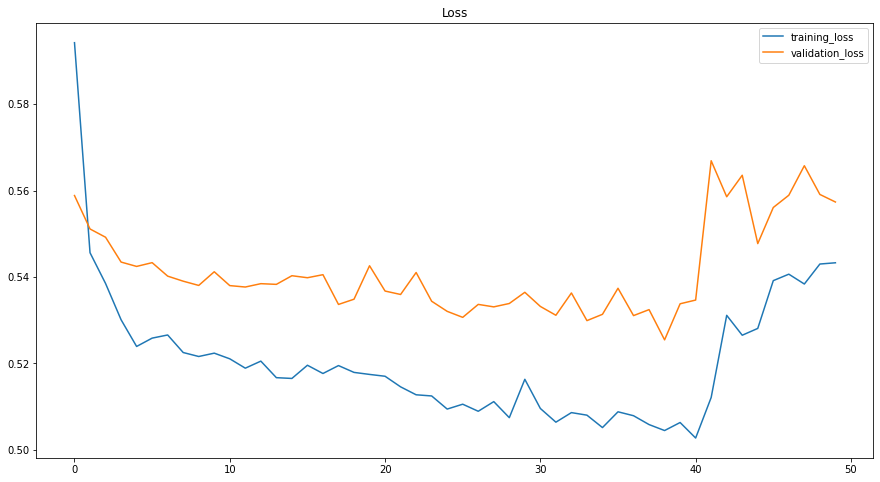

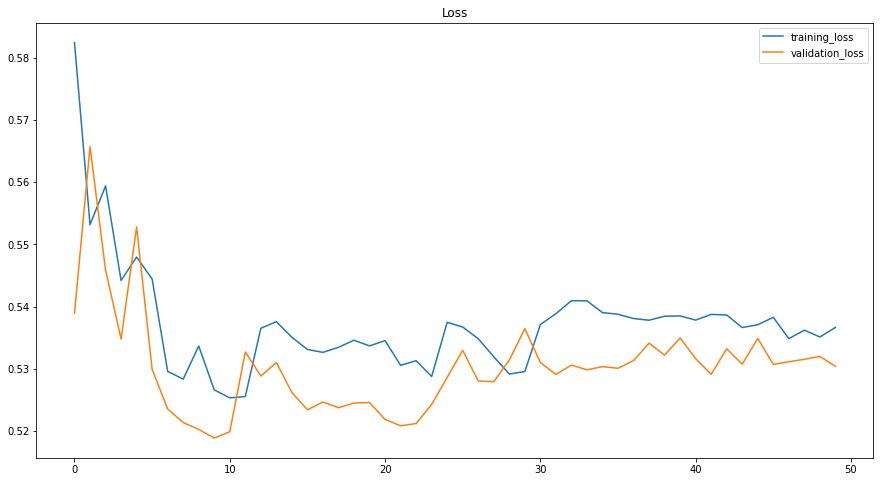

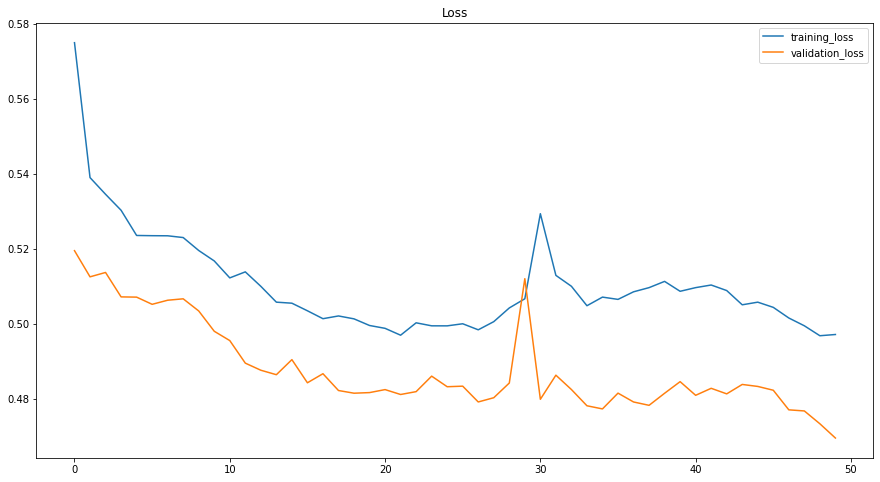

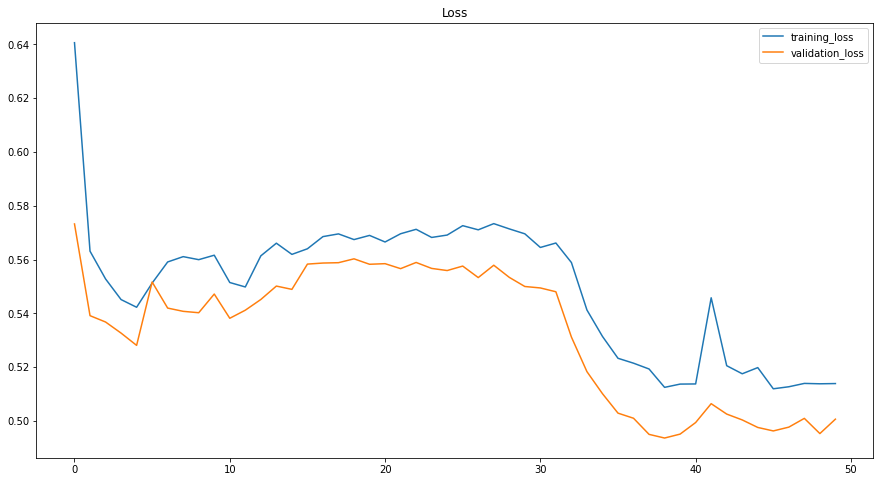

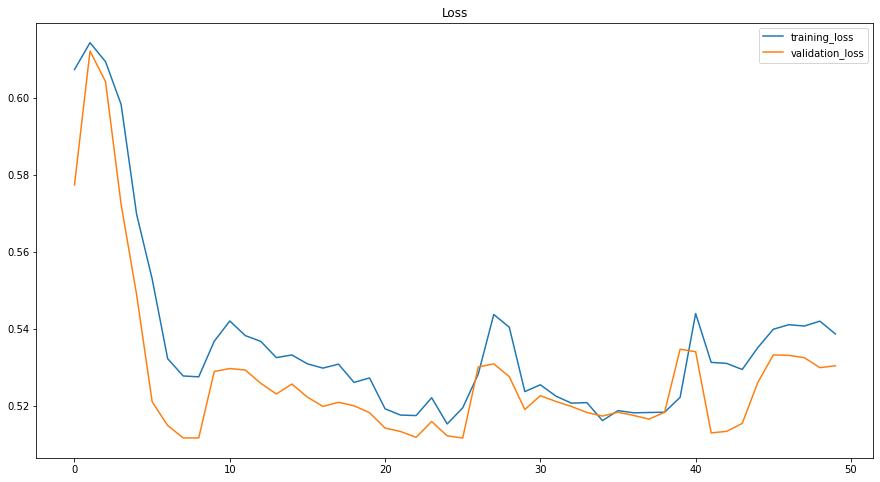

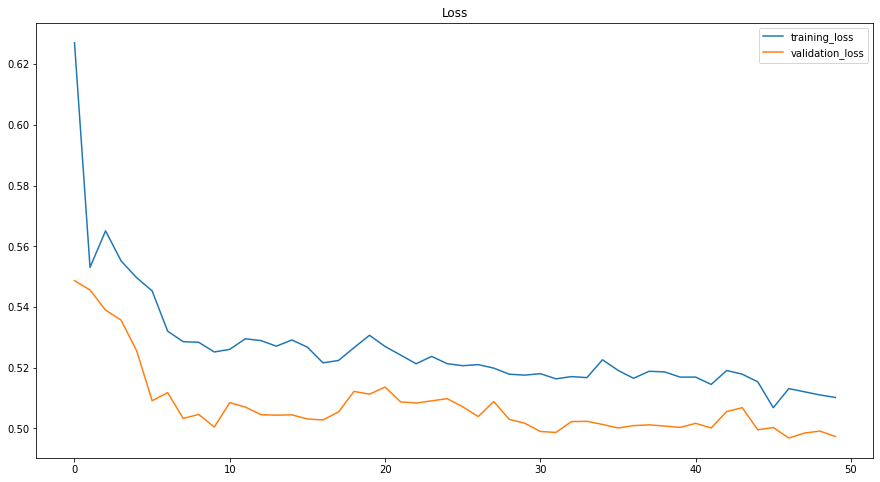

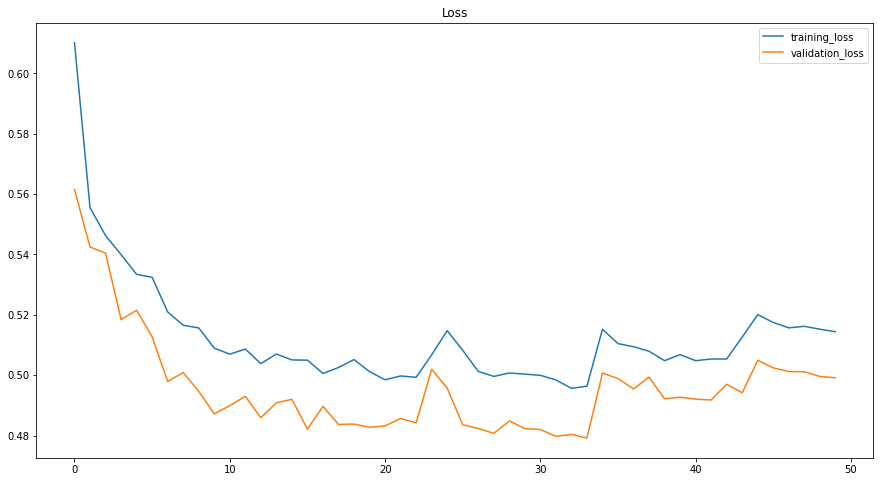

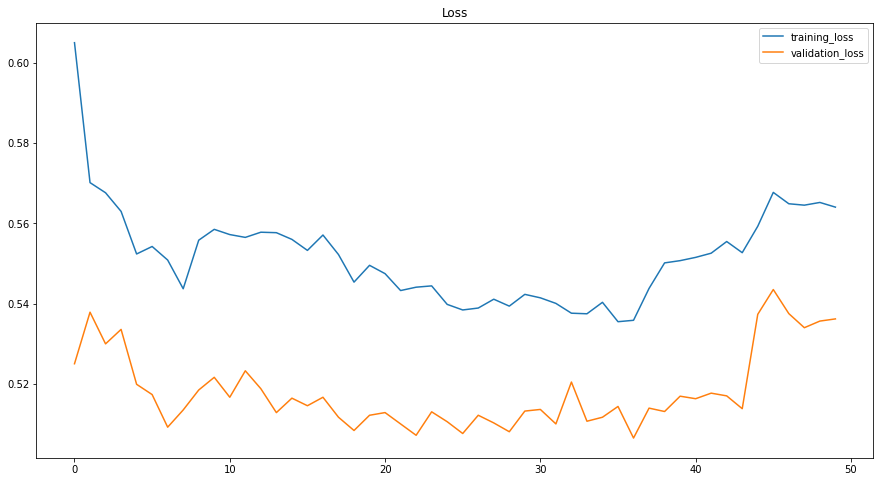

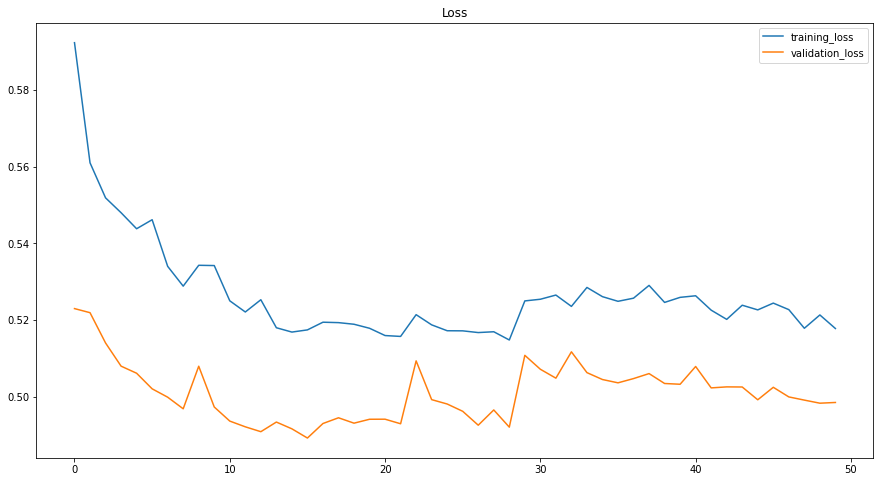

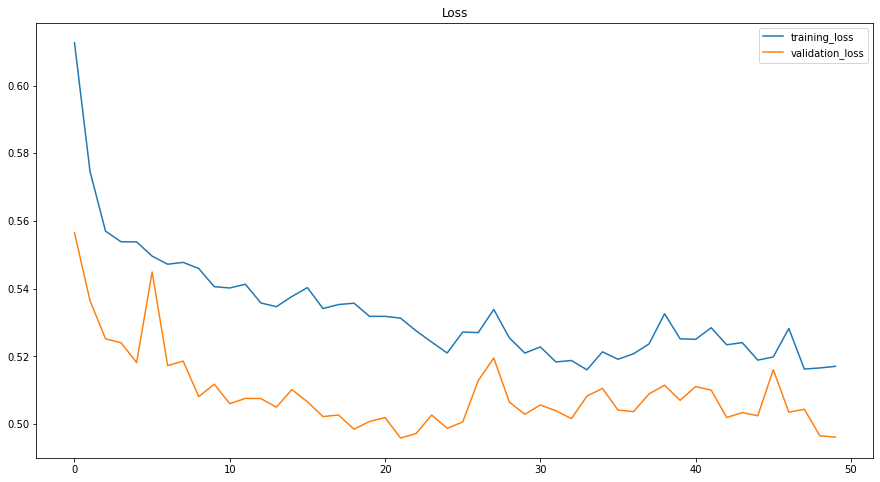

In [42]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt

epochs = 50
validation_accuracy=[]
validation_loss = []
for train, test in kfold.split(inputs, targets):
    lstm_model = tf.keras.Sequential([
        tf.keras.layers.LSTM(32,return_sequences=False),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
    ])
    lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = lstm_model.fit(inputs[train], np.asarray(targets[train]), epochs = epochs, validation_data=(inputs[test], np.asarray(targets[test])), batch_size=64)
    plt.figure(figsize = (15,8))
    plt.plot(range(epochs), history.history['loss'])
    plt.plot(range(epochs), history.history['val_loss'])
    plt.legend(['training_loss', 'validation_loss'])
    plt.title('Loss')
    fig = make_subplots(
        rows=2, cols=1,
        subplot_titles=("Training Accuracy", "Test Accuracy"))

    fig.add_trace(go.Scatter(x=[*range(epochs)], y=history.history['accuracy']), row=1, col=1)

    fig.add_trace(go.Scatter(x=[*range(epochs)], y=history.history['val_accuracy']), row=2, col=1)

    fig.show()
    train_lstm_results = lstm_model.evaluate(inputs[train], np.asarray(targets[train]), verbose=0, batch_size=256)
    test_lstm_results = lstm_model.evaluate(inputs[test], np.asarray(targets[test]), verbose=0, batch_size=256)
    print(f'Train accuracy: {train_lstm_results[1]*100:0.2f}')
    print(f'Test accuracy: {test_lstm_results[1]*100:0.2f}')

0it [00:00, ?it/s]

Epoch 1/50
238/238 [==============================] - 5s 14ms/step - loss: 0.5939 - accuracy: 0.6862 - val_loss: 0.5149 - val_accuracy: 0.7685
Epoch 2/50
238/238 [==============================] - 2s 10ms/step - loss: 0.5332 - accuracy: 0.7540 - val_loss: 0.5002 - val_accuracy: 0.7755
Epoch 3/50
238/238 [==============================] - 2s 10ms/step - loss: 0.5231 - accuracy: 0.7581 - val_loss: 0.4967 - val_accuracy: 0.7785
Epoch 4/50
238/238 [==============================] - 2s 10ms/step - loss: 0.5161 - accuracy: 0.7616 - val_loss: 0.4951 - val_accuracy: 0.7755
Epoch 5/50
238/238 [==============================] - 2s 10ms/step - loss: 0.5191 - accuracy: 0.7613 - val_loss: 0.4993 - val_accuracy: 0.7732
Epoch 6/50
238/238 [==============================] - 2s 10ms/step - loss: 0.5154 - accuracy: 0.7621 - val_loss: 0.4959 - val_accuracy: 0.7785
Epoch 7/50
238/238 [==============================] - 3s 11ms/step - loss: 0.5136 - accuracy: 0.7626 - val_loss: 0.4922 - val_accuracy: 0.7785

1it [02:07, 127.59s/it]

Train accuracy: 78.11
Test accuracy: 78.50
Epoch 1/50
238/238 [==============================] - 5s 13ms/step - loss: 0.6091 - accuracy: 0.6840 - val_loss: 0.5316 - val_accuracy: 0.7791
Epoch 2/50
238/238 [==============================] - 2s 10ms/step - loss: 0.5564 - accuracy: 0.7337 - val_loss: 0.5070 - val_accuracy: 0.7832
Epoch 3/50
238/238 [==============================] - 2s 10ms/step - loss: 0.5495 - accuracy: 0.7357 - val_loss: 0.5069 - val_accuracy: 0.7897
Epoch 4/50
238/238 [==============================] - 2s 10ms/step - loss: 0.5367 - accuracy: 0.7459 - val_loss: 0.4910 - val_accuracy: 0.7974
Epoch 5/50
238/238 [==============================] - 2s 10ms/step - loss: 0.5320 - accuracy: 0.7489 - val_loss: 0.4906 - val_accuracy: 0.7850
Epoch 6/50
238/238 [==============================] - 2s 10ms/step - loss: 0.5309 - accuracy: 0.7471 - val_loss: 0.4929 - val_accuracy: 0.7903
Epoch 7/50
238/238 [==============================] - 2s 10ms/step - loss: 0.5315 - accuracy: 0.746

2it [04:06, 122.34s/it]

Train accuracy: 74.46
Test accuracy: 76.85
Epoch 1/50
238/238 [==============================] - 5s 12ms/step - loss: 0.6116 - accuracy: 0.6799 - val_loss: 0.5640 - val_accuracy: 0.7289
Epoch 2/50
238/238 [==============================] - 2s 9ms/step - loss: 0.5680 - accuracy: 0.7295 - val_loss: 0.5532 - val_accuracy: 0.7407
Epoch 3/50
238/238 [==============================] - 2s 9ms/step - loss: 0.5516 - accuracy: 0.7419 - val_loss: 0.5296 - val_accuracy: 0.7602
Epoch 4/50
238/238 [==============================] - 2s 9ms/step - loss: 0.5406 - accuracy: 0.7514 - val_loss: 0.5276 - val_accuracy: 0.7555
Epoch 5/50
238/238 [==============================] - 2s 10ms/step - loss: 0.5383 - accuracy: 0.7547 - val_loss: 0.5232 - val_accuracy: 0.7572
Epoch 6/50
238/238 [==============================] - 2s 9ms/step - loss: 0.5353 - accuracy: 0.7547 - val_loss: 0.5208 - val_accuracy: 0.7537
Epoch 7/50
238/238 [==============================] - 2s 9ms/step - loss: 0.5322 - accuracy: 0.7552 - v

3it [06:03, 120.16s/it]

Train accuracy: 75.23
Test accuracy: 74.07
Epoch 1/50
238/238 [==============================] - 5s 13ms/step - loss: 0.6208 - accuracy: 0.6577 - val_loss: 0.5350 - val_accuracy: 0.7637
Epoch 2/50
238/238 [==============================] - 2s 10ms/step - loss: 0.5662 - accuracy: 0.7270 - val_loss: 0.5308 - val_accuracy: 0.7478
Epoch 3/50
238/238 [==============================] - 2s 10ms/step - loss: 0.5636 - accuracy: 0.7254 - val_loss: 0.5389 - val_accuracy: 0.7496
Epoch 4/50
238/238 [==============================] - 2s 10ms/step - loss: 0.5647 - accuracy: 0.7256 - val_loss: 0.5424 - val_accuracy: 0.7478
Epoch 5/50
238/238 [==============================] - 2s 10ms/step - loss: 0.5615 - accuracy: 0.7266 - val_loss: 0.5216 - val_accuracy: 0.7496
Epoch 6/50
238/238 [==============================] - 2s 10ms/step - loss: 0.5490 - accuracy: 0.7353 - val_loss: 0.5173 - val_accuracy: 0.7543
Epoch 7/50
238/238 [==============================] - 2s 10ms/step - loss: 0.5600 - accuracy: 0.735

4it [08:06, 121.22s/it]

Train accuracy: 76.86
Test accuracy: 76.14
Epoch 1/50
238/238 [==============================] - 5s 12ms/step - loss: 0.6008 - accuracy: 0.6843 - val_loss: 0.5160 - val_accuracy: 0.7761
Epoch 2/50
238/238 [==============================] - 2s 10ms/step - loss: 0.5447 - accuracy: 0.7453 - val_loss: 0.5103 - val_accuracy: 0.7738
Epoch 3/50
238/238 [==============================] - 2s 10ms/step - loss: 0.5440 - accuracy: 0.7429 - val_loss: 0.5102 - val_accuracy: 0.7803
Epoch 4/50
238/238 [==============================] - 2s 10ms/step - loss: 0.5363 - accuracy: 0.7489 - val_loss: 0.5056 - val_accuracy: 0.7773
Epoch 5/50
238/238 [==============================] - 2s 10ms/step - loss: 0.5334 - accuracy: 0.7512 - val_loss: 0.5034 - val_accuracy: 0.7779
Epoch 6/50
238/238 [==============================] - 2s 10ms/step - loss: 0.5362 - accuracy: 0.7506 - val_loss: 0.5071 - val_accuracy: 0.7726
Epoch 7/50
238/238 [==============================] - 2s 10ms/step - loss: 0.5310 - accuracy: 0.751

5it [10:05, 120.45s/it]

Train accuracy: 77.50
Test accuracy: 79.03
Epoch 1/50
239/239 [==============================] - 5s 13ms/step - loss: 0.6351 - accuracy: 0.6439 - val_loss: 0.5472 - val_accuracy: 0.7323
Epoch 2/50
239/239 [==============================] - 3s 11ms/step - loss: 0.5615 - accuracy: 0.7329 - val_loss: 0.5195 - val_accuracy: 0.7683
Epoch 3/50
239/239 [==============================] - 3s 11ms/step - loss: 0.5517 - accuracy: 0.7362 - val_loss: 0.5192 - val_accuracy: 0.7648
Epoch 4/50
239/239 [==============================] - 3s 11ms/step - loss: 0.5470 - accuracy: 0.7417 - val_loss: 0.5218 - val_accuracy: 0.7535
Epoch 5/50
239/239 [==============================] - 3s 11ms/step - loss: 0.5413 - accuracy: 0.7457 - val_loss: 0.5152 - val_accuracy: 0.7665
Epoch 6/50
239/239 [==============================] - 3s 11ms/step - loss: 0.5360 - accuracy: 0.7461 - val_loss: 0.5151 - val_accuracy: 0.7589
Epoch 7/50
239/239 [==============================] - 3s 11ms/step - loss: 0.5329 - accuracy: 0.750

6it [12:26, 127.22s/it]

Train accuracy: 77.46
Test accuracy: 77.78
Epoch 1/50
239/239 [==============================] - 5s 13ms/step - loss: 0.6019 - accuracy: 0.6867 - val_loss: 0.5576 - val_accuracy: 0.7311
Epoch 2/50
239/239 [==============================] - 3s 11ms/step - loss: 0.5582 - accuracy: 0.7319 - val_loss: 0.5385 - val_accuracy: 0.7470
Epoch 3/50
239/239 [==============================] - 3s 11ms/step - loss: 0.5478 - accuracy: 0.7454 - val_loss: 0.5354 - val_accuracy: 0.7541
Epoch 4/50
239/239 [==============================] - 3s 11ms/step - loss: 0.5441 - accuracy: 0.7482 - val_loss: 0.5311 - val_accuracy: 0.7553
Epoch 5/50
239/239 [==============================] - 3s 11ms/step - loss: 0.5428 - accuracy: 0.7496 - val_loss: 0.5325 - val_accuracy: 0.7500
Epoch 6/50
239/239 [==============================] - 3s 11ms/step - loss: 0.5417 - accuracy: 0.7515 - val_loss: 0.5314 - val_accuracy: 0.7512
Epoch 7/50
239/239 [==============================] - 3s 11ms/step - loss: 0.5364 - accuracy: 0.754

7it [14:41, 129.87s/it]

Train accuracy: 76.68
Test accuracy: 75.59
Epoch 1/50
239/239 [==============================] - 6s 13ms/step - loss: 0.6090 - accuracy: 0.6841 - val_loss: 0.5348 - val_accuracy: 0.7618
Epoch 2/50
239/239 [==============================] - 3s 11ms/step - loss: 0.5637 - accuracy: 0.7325 - val_loss: 0.5217 - val_accuracy: 0.7766
Epoch 3/50
239/239 [==============================] - 3s 11ms/step - loss: 0.5617 - accuracy: 0.7325 - val_loss: 0.5184 - val_accuracy: 0.7778
Epoch 4/50
239/239 [==============================] - 3s 11ms/step - loss: 0.5536 - accuracy: 0.7348 - val_loss: 0.5145 - val_accuracy: 0.7701
Epoch 5/50
239/239 [==============================] - 3s 11ms/step - loss: 0.5412 - accuracy: 0.7461 - val_loss: 0.5132 - val_accuracy: 0.7736
Epoch 6/50
239/239 [==============================] - 3s 12ms/step - loss: 0.5462 - accuracy: 0.7441 - val_loss: 0.5139 - val_accuracy: 0.7772
Epoch 7/50
239/239 [==============================] - 3s 11ms/step - loss: 0.5442 - accuracy: 0.740

8it [17:04, 134.09s/it]

Train accuracy: 75.45
Test accuracy: 76.30
Epoch 1/50
239/239 [==============================] - 5s 13ms/step - loss: 0.5960 - accuracy: 0.6964 - val_loss: 0.5507 - val_accuracy: 0.7447
Epoch 2/50
239/239 [==============================] - 3s 11ms/step - loss: 0.5481 - accuracy: 0.7411 - val_loss: 0.5328 - val_accuracy: 0.7600
Epoch 3/50
239/239 [==============================] - 3s 11ms/step - loss: 0.5407 - accuracy: 0.7436 - val_loss: 0.5370 - val_accuracy: 0.7583
Epoch 4/50
239/239 [==============================] - 3s 11ms/step - loss: 0.5383 - accuracy: 0.7464 - val_loss: 0.5259 - val_accuracy: 0.7565
Epoch 5/50
239/239 [==============================] - 3s 11ms/step - loss: 0.5339 - accuracy: 0.7491 - val_loss: 0.5285 - val_accuracy: 0.7535
Epoch 6/50
239/239 [==============================] - 3s 12ms/step - loss: 0.5534 - accuracy: 0.7388 - val_loss: 0.5406 - val_accuracy: 0.7530
Epoch 7/50
239/239 [==============================] - 3s 12ms/step - loss: 0.5488 - accuracy: 0.743

9it [19:24, 135.92s/it]

Train accuracy: 76.50
Test accuracy: 75.71
Epoch 1/50
239/239 [==============================] - 5s 14ms/step - loss: 0.5957 - accuracy: 0.6982 - val_loss: 0.5660 - val_accuracy: 0.7435
Epoch 2/50
239/239 [==============================] - 3s 12ms/step - loss: 0.5707 - accuracy: 0.7236 - val_loss: 0.5472 - val_accuracy: 0.7346
Epoch 3/50
239/239 [==============================] - 3s 12ms/step - loss: 0.5712 - accuracy: 0.7183 - val_loss: 0.5693 - val_accuracy: 0.7329
Epoch 4/50
239/239 [==============================] - 3s 12ms/step - loss: 0.5759 - accuracy: 0.7209 - val_loss: 0.5601 - val_accuracy: 0.7340
Epoch 5/50
239/239 [==============================] - 3s 12ms/step - loss: 0.5720 - accuracy: 0.7240 - val_loss: 0.5568 - val_accuracy: 0.7299
Epoch 6/50
239/239 [==============================] - 3s 12ms/step - loss: 0.5737 - accuracy: 0.7213 - val_loss: 0.5660 - val_accuracy: 0.7352
Epoch 7/50
239/239 [==============================] - 3s 12ms/step - loss: 0.5692 - accuracy: 0.724

10it [21:49, 130.96s/it]

Train accuracy: 77.34
Test accuracy: 75.83
average test accuracy: 76.58


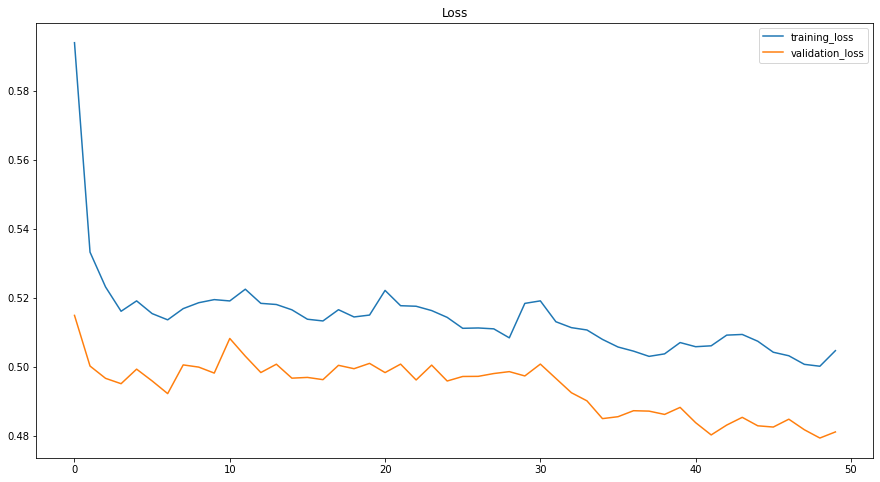

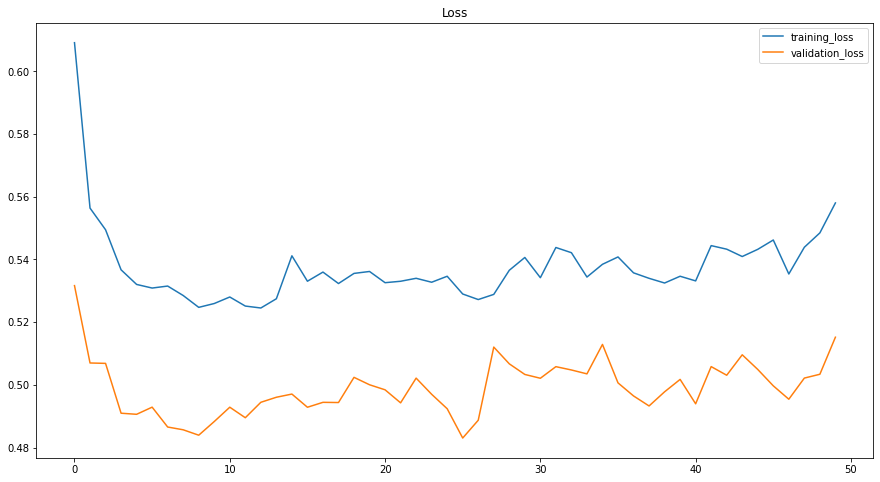

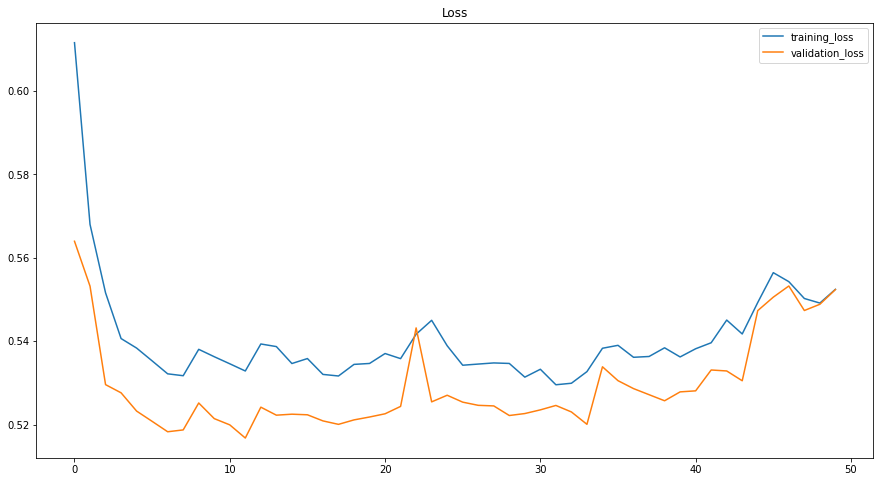

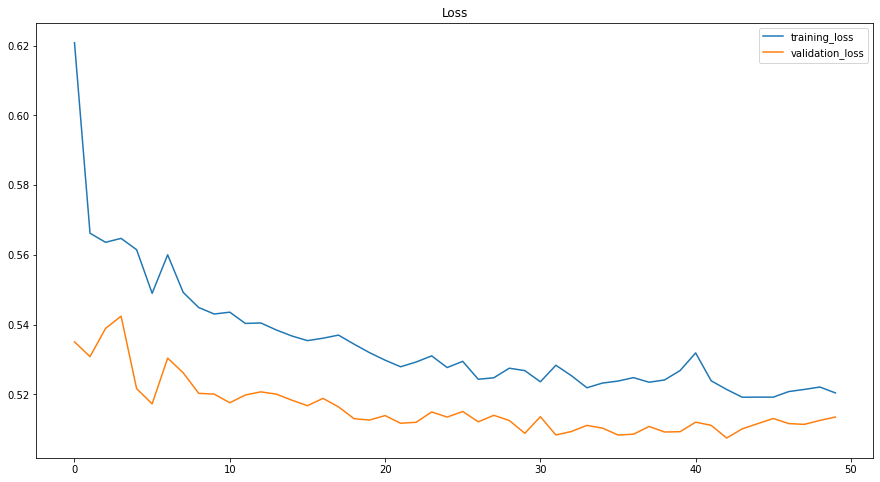

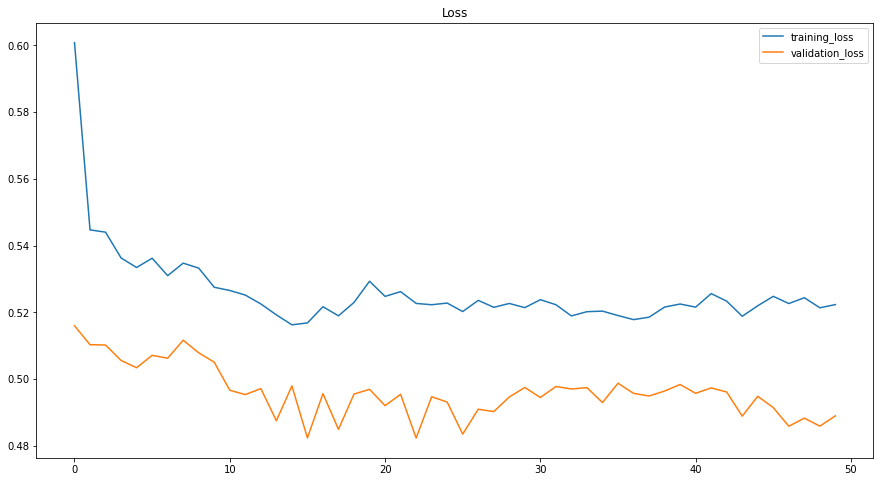

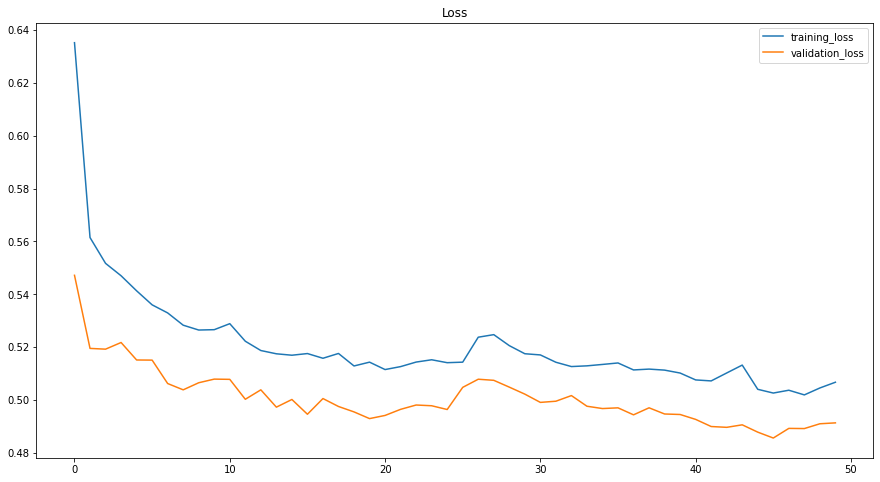

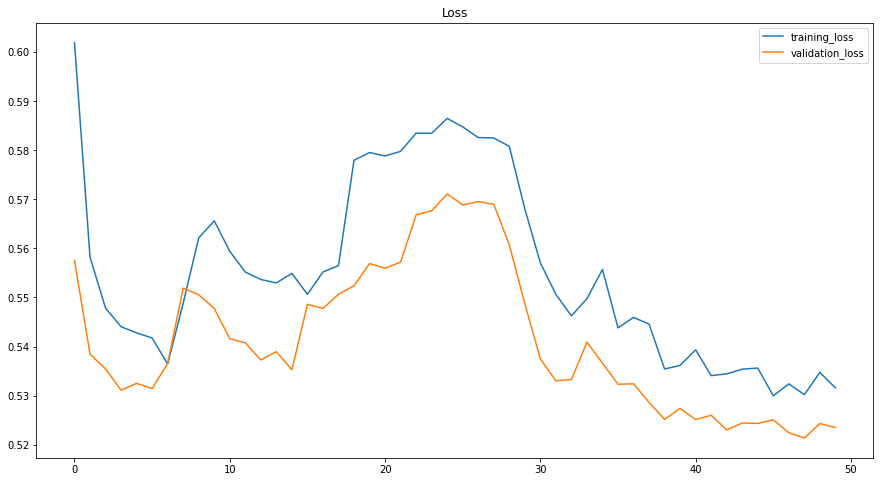

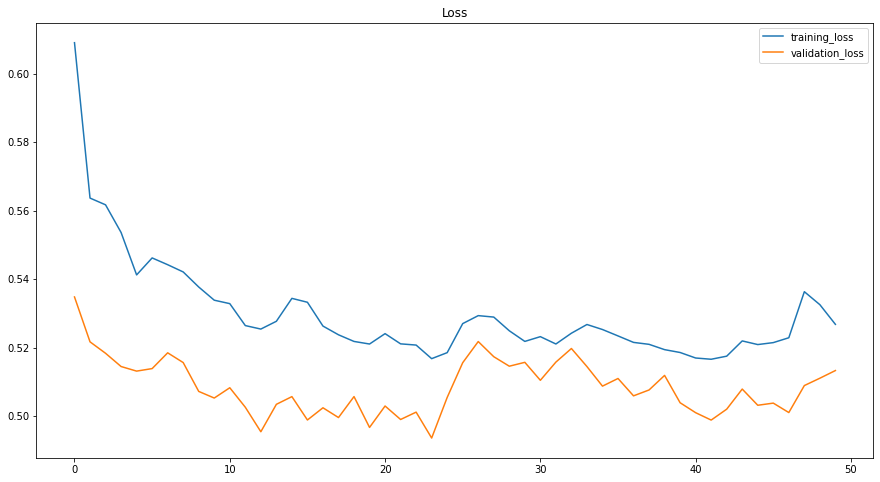

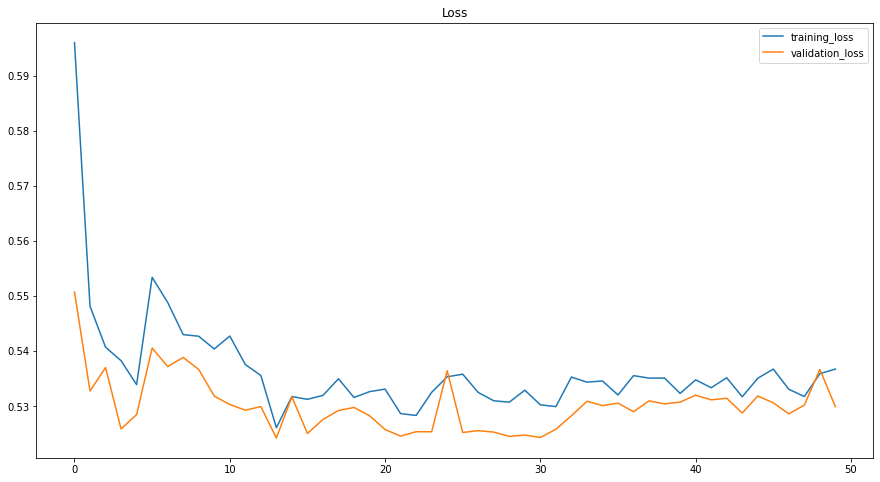

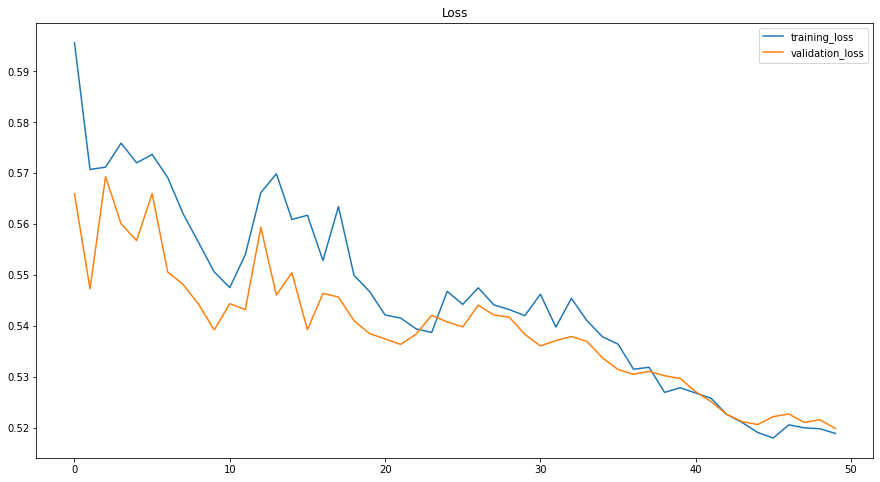

In [43]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt

epochs = 50
validation_accuracy=[]
validation_loss = []
fold_n =1
for train, test in tqdm(kfold.split(inputs, targets)):
    lstm_model = tf.keras.Sequential([
        tf.keras.layers.LSTM(64,return_sequences=False),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
    ])
    lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = lstm_model.fit(inputs[train], np.asarray(targets[train]), epochs = epochs, validation_data=(inputs[test], np.asarray(targets[test])), batch_size=64)
    print(f'============ {fold_n} fold result===========')
    plt.figure(figsize = (15,8))
    plt.plot(range(epochs), history.history['loss'])
    plt.plot(range(epochs), history.history['val_loss'])
    plt.legend(['training_loss', 'validation_loss'])
    plt.title('Loss')
    fig = make_subplots(
        rows=2, cols=1,
        subplot_titles=("Training Accuracy", "Test Accuracy"))

    fig.add_trace(go.Scatter(x=[*range(epochs)], y=history.history['accuracy']), row=1, col=1)

    fig.add_trace(go.Scatter(x=[*range(epochs)], y=history.history['val_accuracy']), row=2, col=1)

    fig.show()
    train_lstm_results = lstm_model.evaluate(inputs[train], np.asarray(targets[train]), verbose=0, batch_size=256)
    test_lstm_results = lstm_model.evaluate(inputs[test], np.asarray(targets[test]), verbose=0, batch_size=256)
    print(f'Train accuracy: {train_lstm_results[1]*100:0.2f}')
    print(f'Test accuracy: {test_lstm_results[1]*100:0.2f}')
    validation_accuracy.append(test_lstm_results[1]*100)
print(f"average test accuracy: {sum(validation_accuracy)/10:0.2f}" )

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt

epochs = 50
validation_accuracy=[]
validation_loss = []
fold_n =1
for train, test in tqdm(kfold.split(inputs, targets)):
    lstm_model = tf.keras.Sequential([
        tf.keras.layers.LSTM(128,return_sequences=True),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(64),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
    ])
    lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = lstm_model.fit(inputs[train], np.asarray(targets[train]), epochs = epochs, validation_data=(inputs[test], np.asarray(targets[test])), batch_size=64)
    print(f'============ {fold_n} fold result===========')
    fold_n+=1
    plt.figure(figsize = (15,8))
    plt.plot(range(epochs), history.history['loss'])
    plt.plot(range(epochs), history.history['val_loss'])
    plt.legend(['training_loss', 'validation_loss'])
    plt.title('Loss')
    fig = make_subplots(
        rows=2, cols=1,
        subplot_titles=("Training Accuracy", "Test Accuracy"))

    fig.add_trace(go.Scatter(x=[*range(epochs)], y=history.history['accuracy']), row=1, col=1)

    fig.add_trace(go.Scatter(x=[*range(epochs)], y=history.history['val_accuracy']), row=2, col=1)

    fig.show()
    train_lstm_results = lstm_model.evaluate(inputs[train], np.asarray(targets[train]), verbose=0, batch_size=256)
    test_lstm_results = lstm_model.evaluate(inputs[test], np.asarray(targets[test]), verbose=0, batch_size=256)
    print(f'Train accuracy: {train_lstm_results[1]*100:0.2f}')
    print(f'Test accuracy: {test_lstm_results[1]*100:0.2f}')
    validation_accuracy.append(test_lstm_results[1]*100)
print(f"average test accuracy: {sum(validation_accuracy)/10:0.2f}" )

0it [00:00, ?it/s]

Epoch 1/50
238/238 [==============================] - 14s 45ms/step - loss: 0.4692 - accuracy: 0.7891 - val_loss: 0.4202 - val_accuracy: 0.8104
Epoch 2/50
238/238 [==============================] - 10s 40ms/step - loss: 0.4206 - accuracy: 0.8083 - val_loss: 0.4006 - val_accuracy: 0.8198
Epoch 3/50
238/238 [==============================] - 10s 40ms/step - loss: 0.4116 - accuracy: 0.8117 - val_loss: 0.4134 - val_accuracy: 0.8228
Epoch 4/50
238/238 [==============================] - 9s 40ms/step - loss: 0.4067 - accuracy: 0.8153 - val_loss: 0.4133 - val_accuracy: 0.8151
Epoch 5/50
238/238 [==============================] - 10s 40ms/step - loss: 0.3920 - accuracy: 0.8274 - val_loss: 0.3940 - val_accuracy: 0.8269
Epoch 6/50
238/238 [==============================] - 10s 40ms/step - loss: 0.3803 - accuracy: 0.8328 - val_loss: 0.3693 - val_accuracy: 0.8376
Epoch 7/50
238/238 [==============================] - 10s 40ms/step - loss: 0.3737 - accuracy: 0.8353 - val_loss: 0.3571 - val_accuracy: 

1it [08:41, 521.30s/it]

Train accuracy: 89.29
Test accuracy: 87.83
Epoch 1/50
238/238 [==============================] - 16s 51ms/step - loss: 0.4594 - accuracy: 0.7954 - val_loss: 0.4412 - val_accuracy: 0.8045
Epoch 2/50
238/238 [==============================] - 11s 45ms/step - loss: 0.4321 - accuracy: 0.8082 - val_loss: 0.4172 - val_accuracy: 0.8092
Epoch 3/50
238/238 [==============================] - 10s 43ms/step - loss: 0.4153 - accuracy: 0.8144 - val_loss: 0.4058 - val_accuracy: 0.8193
Epoch 4/50
238/238 [==============================] - 11s 44ms/step - loss: 0.4122 - accuracy: 0.8160 - val_loss: 0.3888 - val_accuracy: 0.8222
Epoch 5/50
238/238 [==============================] - 10s 43ms/step - loss: 0.3972 - accuracy: 0.8222 - val_loss: 0.3855 - val_accuracy: 0.8281
Epoch 6/50
238/238 [==============================] - 10s 42ms/step - loss: 0.3921 - accuracy: 0.8273 - val_loss: 0.3889 - val_accuracy: 0.8269
Epoch 7/50
238/238 [==============================] - 10s 43ms/step - loss: 0.3785 - accuracy

2it [17:19, 519.49s/it]

Train accuracy: 89.30
Test accuracy: 88.30
Epoch 1/50
238/238 [==============================] - 14s 44ms/step - loss: 0.4635 - accuracy: 0.7918 - val_loss: 0.4382 - val_accuracy: 0.7891
Epoch 2/50
238/238 [==============================] - 9s 37ms/step - loss: 0.4245 - accuracy: 0.8069 - val_loss: 0.4270 - val_accuracy: 0.7974
Epoch 3/50
238/238 [==============================] - 9s 37ms/step - loss: 0.4138 - accuracy: 0.8136 - val_loss: 0.4257 - val_accuracy: 0.7992
Epoch 4/50
238/238 [==============================] - 9s 37ms/step - loss: 0.4062 - accuracy: 0.8179 - val_loss: 0.4333 - val_accuracy: 0.8092
Epoch 5/50
238/238 [==============================] - 9s 38ms/step - loss: 0.3954 - accuracy: 0.8248 - val_loss: 0.4028 - val_accuracy: 0.8139
Epoch 6/50
238/238 [==============================] - 9s 37ms/step - loss: 0.3890 - accuracy: 0.8300 - val_loss: 0.3918 - val_accuracy: 0.8116
Epoch 7/50
238/238 [==============================] - 9s 38ms/step - loss: 0.3789 - accuracy: 0.83

3it [24:43, 484.86s/it]

Train accuracy: 89.77
Test accuracy: 88.19
Epoch 1/50
238/238 [==============================] - 13s 42ms/step - loss: 0.4649 - accuracy: 0.7899 - val_loss: 0.4388 - val_accuracy: 0.7950
Epoch 2/50
238/238 [==============================] - 9s 39ms/step - loss: 0.4232 - accuracy: 0.8071 - val_loss: 0.4144 - val_accuracy: 0.8139
Epoch 3/50
238/238 [==============================] - 9s 38ms/step - loss: 0.4056 - accuracy: 0.8160 - val_loss: 0.4283 - val_accuracy: 0.8210
Epoch 4/50
238/238 [==============================] - 9s 37ms/step - loss: 0.4102 - accuracy: 0.8169 - val_loss: 0.3920 - val_accuracy: 0.8187
Epoch 5/50
238/238 [==============================] - 9s 37ms/step - loss: 0.3928 - accuracy: 0.8256 - val_loss: 0.3766 - val_accuracy: 0.8334
Epoch 6/50
238/238 [==============================] - 9s 38ms/step - loss: 0.3887 - accuracy: 0.8285 - val_loss: 0.3747 - val_accuracy: 0.8393
Epoch 7/50
238/238 [==============================] - 9s 37ms/step - loss: 0.3787 - accuracy: 0.83

In [ ]:
epochs = 30
validation_accuracy=[]
validation_loss = []
fold_n =1
for train, test in tqdm(kfold.split(inputs, targets)):
    lstm_model = tf.keras.Sequential([
        tf.keras.layers.LSTM(128,return_sequences=True),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(64),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
    ])
    lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = lstm_model.fit(inputs[train], np.asarray(targets[train]), epochs = epochs, validation_data=(inputs[test], np.asarray(targets[test])), batch_size=64)
    print(f'============ {fold_n} fold result===========')
    fold_n+=1
    plt.figure(figsize = (15,8))
    plt.plot(range(epochs), history.history['loss'])
    plt.plot(range(epochs), history.history['val_loss'])
    plt.legend(['training_loss', 'validation_loss'])
    plt.title('Loss')
    fig = make_subplots(
        rows=2, cols=1,
        subplot_titles=("Training Accuracy", "Test Accuracy"))

    fig.add_trace(go.Scatter(x=[*range(epochs)], y=history.history['accuracy']), row=1, col=1)

    fig.add_trace(go.Scatter(x=[*range(epochs)], y=history.history['val_accuracy']), row=2, col=1)

    fig.show()
    train_lstm_results = lstm_model.evaluate(inputs[train], np.asarray(targets[train]), verbose=0, batch_size=256)
    test_lstm_results = lstm_model.evaluate(inputs[test], np.asarray(targets[test]), verbose=0, batch_size=256)
    print(f'Train accuracy: {train_lstm_results[1]*100:0.2f}')
    print(f'Test accuracy: {test_lstm_results[1]*100:0.2f}')
    validation_accuracy.append(test_lstm_results[1]*100)
print(f"average test accuracy: {sum(validation_accuracy)/10:0.2f}" )